In [1]:
import os, shutil

In [2]:
from functools import reduce

def get_dir(dir_vector):
    return reduce(lambda acc, dir: os.path.join(acc, dir), dir_vector)

base_dir = os.path.abspath('./dog-vs-cat-small')
train_dirs = dict([(cls, get_dir([base_dir, 'train', cls])) for cls in ['dog', 'cat']])
validation_dirs = dict([(cls, get_dir([base_dir, 'validation', cls])) for cls in ['dog', 'cat']])
test_dirs = dict([(cls, get_dir([base_dir, 'test', cls])) for cls in ['dog', 'cat']])

In [ ]:
for data_set in [train_dirs, validation_dirs, test_dirs]:
    for (cls, dir) in data_set.items():
        os.makedirs(dir)
        

In [3]:
original_dataset_dir = os.path.abspath('./dogs-vs-cats')

for i in range(1000):
    shutil.copy(os.path.join(original_dataset_dir, 'train/cat.{}.jpg'.format(i)),
                train_dirs['cat'])
    shutil.copy(os.path.join(original_dataset_dir, 'train/dog.{}.jpg'.format(i)),
                train_dirs['dog'])
    
for i in range(1000, 1500):
    shutil.copy(os.path.join(original_dataset_dir, 'train/cat.{}.jpg'.format(i)),
                validation_dirs['cat'])
    shutil.copy(os.path.join(original_dataset_dir, 'train/dog.{}.jpg'.format(i)),
                validation_dirs['dog'])

for i in range(1500, 2000):
    shutil.copy(os.path.join(original_dataset_dir, 'train/cat.{}.jpg'.format(i)),
                test_dirs['cat'])
    shutil.copy(os.path.join(original_dataset_dir, 'train/dog.{}.jpg'.format(i)),
                test_dirs['dog'])

In [4]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # Output: (148, 148, 32)
model.add(layers.MaxPooling2D((2, 2))) # Output: (74, 74, 32)
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # Output: (72, 72, 64)
model.add(layers.MaxPooling2D((2, 2))) # Output: (37, 37, 64)
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Output: (35, 35, 128)
model.add(layers.MaxPooling2D((2, 2))) # Output: (17, 17, 128)
model.add(layers.Conv2D(128, (3, 3), activation='relu')) # Output: (15, 15, 128)
model.add(layers.MaxPooling2D((2, 2))) # Output: (7, 7, 128)
model.add(layers.Flatten()) # Output: (6272)
model.add(layers.Dense(512, activation='relu')) # Output: (512)
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(os.path.commonpath(train_dirs.values()),
                                                                         target_size=(150, 150),
                                                                         batch_size=20,
                                                                         class_mode='binary')
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(os.path.commonpath(validation_dirs.values()),
                                                                              target_size=(150, 150),
                                                                              batch_size=20,
                                                                              class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print(data_batch.shape)
    print(labels_batch.shape)
    break


(20, 150, 150, 3)
(20,)


In [8]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 56s 560ms/step - loss: 0.6904 - acc: 0.5355 - val_loss: 0.6791 - val_acc: 0.5130
Epoch 2/30
100/100 [==============================] - 62s 618ms/step - loss: 0.6586 - acc: 0.6010 - val_loss: 0.6382 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 62s 623ms/step - loss: 0.6108 - acc: 0.6745 - val_loss: 0.6033 - val_acc: 0.6680
Epoch 4/30
100/100 [==============================] - 62s 619ms/step - loss: 0.5708 - acc: 0.6985 - val_loss: 0.6146 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 60s 601ms/step - loss: 0.5393 - acc: 0.7385 - val_loss: 0.5768 - val_acc: 0.6860
Epoch 6/30
100/100 [==============================] - 64s 642ms/step - loss: 0.5139 - acc: 0.7445 - val_loss: 0.5853 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 62s 622ms/step - loss: 0.4890 - acc: 0.7540 - val_loss: 0.5472 - val_acc: 0.7120
Epoch 8

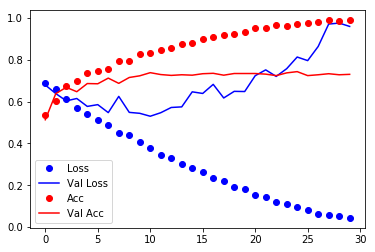

In [16]:
from matplotlib import pyplot as plt

plt.plot(history.epoch, history.history['loss'], 'bo', label='Loss')
plt.plot(history.epoch, history.history['val_loss'], 'b', label='Val Loss')
plt.plot(history.epoch, history.history['acc'], 'ro', label='Acc')
plt.plot(history.epoch, history.history['val_acc'], 'r', label='Val Acc')
plt.legend()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]